In [ ]:
!pip install -U albumentations

In [ ]:
!gdown --id 10fKUF1u3uhIrhEipoklNgysmPyYuYGV9 -O kaggle_m3.zip

In [ ]:
!unzip kaggle_m3.zip

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import seaborn as sns
from skimage.io import imread

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf

import cv2
import albumentations as A

import os
from PIL import Image
import numpy as np

In [6]:
# Set parameters
file_path='/'
Size = (256, 256)
mask_files = glob(file_path + os.path.join('content','*','*_mask*'))
train_files = [file.replace('_mask', '') for file in mask_files]

# Create Dataframe
def label(mask):
    value = np.max(imread(mask))
    return '1' if value > 0 else '0'
df = pd.DataFrame({"image": train_files,
                   "mask": mask_files,
                  "label":[label(x) for x in mask_files]})

In [7]:
df.head()

,image,mask,label
0,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,0
1,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,0
2,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,0
3,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,0
4,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,/content/TCGA_HT_7881_19981015/TCGA_HT_7881_19...,0


In [32]:
df["label"].value_counts()

0    2556
1    1373
Name: label, dtype: int64

In [8]:
from skimage.color import rgb2gray
from skimage.io import imread

def show_image_and_mask(img_path, mask_path):
    rgb_img = imread(img_path)
    gray_img = rgb2gray(rgb_img)
    mask_img = imread(mask_path)

    fig, axes = plt.subplots(1, 3, figsize=(10, 8))
    ax = axes.ravel()
    ax[0].imshow(rgb_img)
    ax[0].set_title("Original")
    ax[1].imshow(gray_img, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    ax[2].imshow(mask_img)
    ax[2].set_title("Mask")
    fig.tight_layout()

In [16]:
def show_image_and_mask_1(img, mask):
    gray_img = rgb2gray(img)

    fig, axes = plt.subplots(1, 3, figsize=(10, 8))
    ax = axes.ravel()
    ax[0].imshow(img)
    ax[0].set_title("Original")
    ax[1].imshow(gray_img, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    ax[2].imshow(mask)
    ax[2].set_title("Mask")
    fig.tight_layout()

In [69]:
transform = A.Compose([
    A.Flip(p=0.8),
    A.Rotate(limit=90, p=0.8),
    A.RandomContrast(),
    A.RandomBrightnessContrast()
])

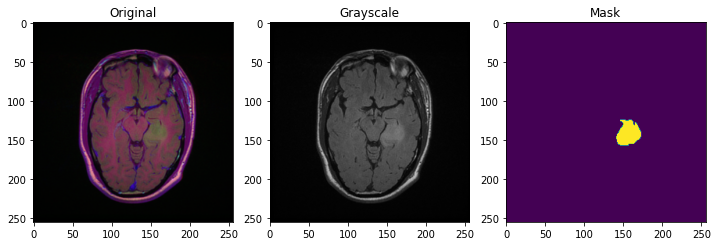

In [105]:
test_image = df[df["label"] == "1"].iloc[3, 0]
test_mask = df[df["label"] == "1"].iloc[3, 1]
image = imread(test_image)
mask = imread(test_mask)
show_image_and_mask(test_image, test_mask)

(256, 256, 3)
(256, 256)


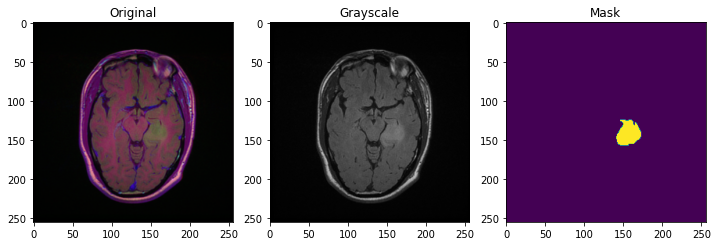

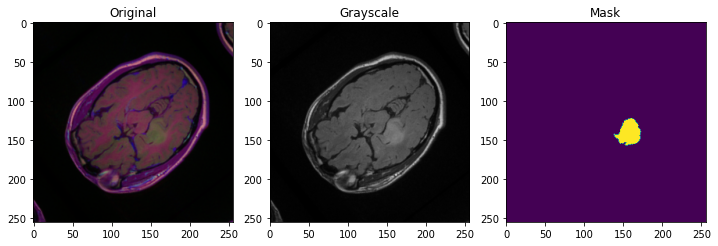

In [110]:
test_image = df[df["label"] == "1"].iloc[3, 0]
test_mask = df[df["label"] == "1"].iloc[3, 1]
image = imread(test_image)
mask = imread(test_mask)
show_image_and_mask(test_image, test_mask)


transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']


print(transformed_image.shape)
print(transformed_mask.shape)
show_image_and_mask_1(transformed_image, transformed_mask)

In [113]:
transform = A.Compose([
    A.Flip(p=0.8),
    A.Rotate(limit=90, p=0.8),
    A.RandomContrast(),
    A.RandomBrightnessContrast()
])

def generate_aug_img(img_path, mask_path):
  img_name = "aug_" + img_path.split("/")[-1]
  mask_name = "aug_" + mask_path.split("/")[-1]

  image = imread(img_path)
  mask = imread(mask_path)
  transformed = transform(image=image, mask=mask)
  transformed_image = transformed['image']
  transformed_mask = transformed['mask']

  cv2.imwrite("/content/data_aug/"+img_name, transformed_image)
  cv2.imwrite("/content/data_aug/"+mask_name, transformed_mask)

  

In [114]:
i = 0
for index, row in df[df["label"] == "1"].iterrows():
  generate_aug_img(row[0], row[1])
  i += 1
i

1373

In [ ]:
!zip -r /content/data_aug.zip /content/data_aug